In [ ]:
#Importer les modules:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
import colorama
from colorama import Fore
from colorama import Style
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib.patches import Circle, Wedge, Rectangle
from math import log10

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols


import ast
import scipy.stats as stats
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.inspection import permutation_importance
import math
from datetime import datetime
from datetime import timedelta, date

from functools import reduce
from sklearn.preprocessing import MinMaxScaler


# Tokenizer.
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

#Bag of words (CountVectorizer, Tfidf).
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import time
import pickle
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING)

#Word2Vec
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
#import gensim

# Bert de hugging face.
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1' #Nécessaire pour utiliser tensorflow, c'est son environnement.

#Analyse d'images.

#SIFT.
from os import listdir
from matplotlib.image import imread
import cv2
import time, cv2
from sklearn import cluster, metrics

#CNN.

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from pickle import dump



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\'titite\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\'titite\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\'titite\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
print(pd.__version__)

1.3.4


In [3]:
!pip install gensim

In [4]:
import gensim

In [ ]:
#A. IMPORTER LES DONNÉES:

In [5]:
cd Desktop\Data Science candidature\Projets\Projet 6\Data\

C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 6\Data


In [6]:
ls

 Le volume dans le lecteur C s'appelle OS
 Le num‚ro de s‚rie du volume est 609B-8774

 R‚pertoire de C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 6\Data

09/09/2022  17:06    <DIR>          .
09/09/2022  17:06    <DIR>          ..
17/08/2022  15:50       345ÿ072ÿ433 Dataset+projet+preïtraitement+textes+images.zip
08/01/2019  14:21         1ÿ706ÿ922 flipkart_com-ecommerce_sample_1050.csv
08/01/2019  15:23    <DIR>          Images
30/08/2022  21:25       960ÿ367ÿ946 universal-sentence-encoder_4.tar.gz
30/08/2022  21:49    <DIR>          use
               3 fichier(s)    1ÿ307ÿ147ÿ301 octets
               4 R‚p(s)  122ÿ234ÿ015ÿ744 octets libres


In [7]:
data_T0 = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
print(data_T0.shape)

(1050, 15)


In [8]:
data_T0.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [9]:
data_T0.count()

uniq_id                    1050
crawl_timestamp            1050
product_url                1050
product_name               1050
product_category_tree      1050
pid                        1050
retail_price               1049
discounted_price           1049
image                      1050
is_FK_Advantage_product    1050
description                1050
product_rating             1050
overall_rating             1050
brand                       712
product_specifications     1049
dtype: int64

In [ ]:
#Pas de données manquantes pour les colonnes qui nous intéressent!

In [10]:
data_T0.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [ ]:
#----------------------------------------------------------------------------------------------------------------------
#B. PRÉTRAITEMENT DES DONNÉES:

#On cherche à automatiser la tâche d'attribution de la catégorie d'un article en fonction de la 'description', le 
#'product_name' et et la photos postées par les vendeurs. On a donc 3 variables qui nous intéressent donc d'explorer:
#'product_name', 'description' et 'image'.

#Le processus de conversion des données en quelque chose qu'un ordinateur peut comprendre est appelé prétraitement. Il y
#a plusieurs choses à faire, créons donc les fonctions qui nous seront utiles:
        #1. Tokenizer -> convertit en tokens des phrases et commentaires. La tokenisation est un moyen de séparer un 
        #                morceau de texte en unités plus petites appelées tokens, qui peuvent être des mots, des 
        #                caractères ou des sous-mots; mais aussi de nettoyer des phrase en enlevant des choses 
        #               'inutiles'(ie. ponctuations, signes etc.). Notre première tokenisation concerne ce 'nettoyage'
        #                de phrases.
        #2. Stop_words -> filtre les mots inutiles (ie. les mots 'vides'), c'est à dire les mots couramment utilisé 
        #                 (tels que "le", "un", "une", "dans") qu'un moteur de recherche a été programmé pour ignorer,
        #                 pour qu'ils ne prennent ni de l'espace ni du temps de traitement. Le packaging 'nltk' (Natural
        #                 Language Toolkit) a une liste de mots 'vides' stockés dans 16 langues différentes; ici t
        #                 l'anglais est celui qui nous intéresse.
        #3. lower case et alpha -> met tout en minuscules et supprime tout ce qui commence par '@' et 'http'.
        #4. Lemmatizer -> joint des mots similaires pour les analyser ensemble.
        
        
#B.1 Fonctions utiles: Tokenizer, Stop words, Lower case et alpha, Lemmatizer.

In [11]:
# Tokenizer (nettoyage de phrases).
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words.
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w] #sélectionne uniquement ce qui est dans "list_words" et non dans "stop_w".
    filtered_w2 = [w for w in filtered_w if len(w) > 2]#sélectionne uniquement les mots qui ont plus de 2 lettres ou éléments.
    return filtered_w2


# lower case et alpha.
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer.  

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

In [ ]:
#Viennent ensuite la construction de fonctions préparatoires pour les approches de type 'Bag of words' et 
#'word/sentence embedding'.

In [12]:
# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec).
#def transform_bow_fct(desc_text):
#    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
#    lw = lower_start_fct(sw)
#    # lem_w = lemma_fct(lw)    
#    transf_desc_text = ' '.join(lw)
#    return transf_desc_text


# Fonction de préparation du texte pour le bag of words avec lemmatization (Countvectorizer et Tf_idf, Word2Vec).
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT).
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [13]:
data_T=data_T0.copy()

In [14]:
#data_T['product_name_bow'] = data_T0['product_name'].apply(lambda x : transform_bow_fct(x))
data_T['product_name_bow_lem'] = data_T0['product_name'].apply(lambda x : transform_bow_lem_fct(x))
data_T['product_name_dl'] = data_T0['product_name'].apply(lambda x : transform_dl_fct(x))

#data_T['description_bow'] = data_T0['description'].apply(lambda x : transform_bow_fct(x))
data_T['description_bow_lem'] = data_T0['description'].apply(lambda x : transform_bow_lem_fct(x))
data_T['description_dl'] = data_T0['description'].apply(lambda x : transform_dl_fct(x))

In [15]:
data_T.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_name_bow_lem,product_name_dl,description_bow_lem,description_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",sathiyas cotton bath towel,sathiyas cotton bath towel,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",eurospa cotton terry face towel set,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...


In [ ]:
#B.2 Identification des 'main_category'.

#Il est important d'identifier les 'main_category' établies manuellement par les vendeurs car nous allons les
#comparer avec celles obtenues par notre automatisation. La 'main_category' de chaque produit est le premier élément du
#'product_category_tree'. On crée alors une colonne 'main_category', avec l'extraction de celles-ci, pour ensuite,
#filtrer les 'main_category' uniques de cette colonne.

In [16]:
data_T['main_category']=data_T['product_category_tree']

In [17]:
for m in range(data_T.shape[0]):
    a=data_T['product_category_tree'][m].split(' >>')
    b=a[0].split('"')[-1]
    data_T['main_category'][m]=b
    print(b)

C:\Users\'titite\AppData\Local\Temp/ipykernel_25620/330331278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T['main_category'][m]=b


Home Furnishing
Baby Care
Baby Care
Home Furnishing
Home Furnishing
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Watches
Home Furnishing
Home Furnishing
Home Furnishing
Home Decor & Festive Needs
Kitchen & Dining
Kitchen & Dining
Home Furnishing
Baby Care
Home Furnishing
Baby Care
Beauty and Personal Care
Kitchen & Dining
Kitchen & Dining
Kitchen & Dining
Computers
Kitchen & Dining
Beauty and Personal Care
Kitchen & Dining
Computers
Kitchen & Dining
Computers
Computers
Computers
Beauty and Personal Care
Beauty and Personal Care
Beauty and Personal Care
Beauty and Personal Care
Beauty and Personal Care
Beauty and Personal Care
Beauty and Personal Care
Baby Care
Kitchen & Dining
Kitchen & Dining
Baby Care
Home Furnishing
Kitchen & Dining
Kitchen & Dining
Kitchen & Dining
Home Furnishing
Kitchen & Dining
Baby Care
Baby C

Home Decor & Festive Needs
Home Furnishing
Beauty and Personal Care
Home Decor & Festive Needs
Home Decor & Festive Needs
Home Furnishing
Home Furnishing
Home Decor & Festive Needs
Home Furnishing
Home Furnishing
Home Furnishing
Home Decor & Festive Needs
Kitchen & Dining
Home Decor & Festive Needs
Home Furnishing
Home Furnishing
Home Furnishing
Home Furnishing
Home Furnishing
Home Furnishing
Home Furnishing
Beauty and Personal Care
Kitchen & Dining
Baby Care
Baby Care
Home Furnishing
Baby Care
Baby Care
Baby Care
Home Decor & Festive Needs
Home Decor & Festive Needs
Baby Care
Beauty and Personal Care
Baby Care
Kitchen & Dining
Baby Care
Baby Care
Baby Care
Baby Care
Baby Care
Home Decor & Festive Needs
Beauty and Personal Care
Home Decor & Festive Needs
Home Decor & Festive Needs
Beauty and Personal Care
Home Decor & Festive Needs
Baby Care
Kitchen & Dining
Kitchen & Dining
Home Furnishing
Kitchen & Dining
Baby Care
Baby Care
Home Decor & Festive Needs
Kitchen & Dining
Home Furnishing

In [18]:
data_T.head(6)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_name_bow_lem,product_name_dl,description_bow_lem,description_dl,main_category
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",sathiyas cotton bath towel,sathiyas cotton bath towel,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",eurospa cotton terry face towel set,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,Home Furnishing
5,893aa5ed55f7cff2eccea7758d7a86bd,2015-12-04 07:25:36 +0000,http://www.flipkart.com/maserati-time-r8851116...,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",WATEAYAHJ8CUCAYM,24400.0,24400.0,893aa5ed55f7cff2eccea7758d7a86bd.jpg,False,Maserati Time R8851116001 Analog Watch - For ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",maserati time r8851116001 analog watch for boy,maserati time r8851116001 analog 

In [19]:
data_T.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
product_name_bow_lem        object
product_name_dl             object
description_bow_lem         object
description_dl              object
main_category               object
dtype: object

In [20]:
l_cat = list(set(data_T['main_category']))
l_cat

['Watches',
 'Baby Care',
 'Beauty and Personal Care',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Computers',
 'Home Furnishing']

In [21]:
y_cat_num = [(l_cat.index(data_T.iloc[i]['main_category'])) for i in range(len(data_T))]
y_cat_num

[6,
 1,
 1,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 3,
 4,
 4,
 6,
 1,
 6,
 1,
 2,
 4,
 4,
 4,
 5,
 4,
 2,
 4,
 5,
 4,
 5,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 4,
 4,
 1,
 6,
 4,
 4,
 4,
 6,
 4,
 1,
 1,
 1,
 2,
 2,
 6,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 4,
 5,
 6,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 6,
 6,
 6,
 1,
 6,
 6,
 6,
 1,
 3,
 1,
 4,
 1,
 5,
 3,
 1,
 3,
 5,
 6,
 1,
 5,
 3,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 1,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 4,
 3,
 1,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,


In [ ]:
#----------------------------------------------------------------------------------------------------------------------
#C. Approches pour extraire les features texte.

#C.1 Approches de type 'bag of words'.

#Un 'bag of words' est une représentation de texte qui décrit l'occurrence de mots dans un document . Cela implique deux
#choses : un vocabulaire de mots connus, et une mesure de la présence de mots connus. 

#Procédure à suivre:
#1. Collecte de la data (chaque ligne de notre dataset sera 'un document'). 
#2. Élaboration de la liste de mots (ie. le vocabulaire).
#3. Scorer les mots dans chaque document. L'objectif est de transformer chaque 'document' (ie.ligne) en un vecteur que 
#   nous pouvons utiliser comme entrée ou sortie pour un modèle d'apprentissage automatique. La méthode de notation la 
#   plus simple consiste à marquer la présence de mots sous la forme d'une valeur booléenne, 0 pour absent, 1 pour 
#   présent.

# Les limitations: Vocabulaire (doit être choisi avec soin); Sparsity (le fait d'utiliser une grande surface de temps et
#                  d'espace par rapport à la quantité); Signification (ignorer l'ordre des mots ignore le contexte et, 
#                  donc, la signification des mots dans le document (sémantique). Le contexte et le sens sont important 
#                  car ils peuvent différencier entre les mêmes mots disposés différemment, les synonymes etc.


#On fait différentes combinaisons pour chaque méthode: 
        #1. Uniquement sur 'product_name_bow_lem';
        #2. Uniquement sur 'description_bow_lem';
        #3. Sur 'product_name_bow_lem' et 'description_bow_lem (ie. sur 'product_description_bow_lem').

#Et on utilise 2 approches: CountVectorizer et TfidfVectorizer:

# 1.CountVectorizer se concentre uniquement sur la fréquence des mots présents dans le corpus sans fournir également 
#l'importance des mots. 

# 2.TfidfVectorizer fournit en plus l'importance des mots; avec lui on peut supprimer les mots qui sont moins importants
#pour l'analyse, rendant ainsi la construction du modèle moins complexe en réduisant les dimensions d'entrée.
#Il permet de trouver les mots qui spécifient ce thème.

    #Note: max_df (float [0.0, 1.0] ou int) -> ignore les termes qui ont une fréquence de document strictement 
    #                                          supérieure au seuil donné. S'il est flottant, le paramètre représente  
    #                                          une proportion de documents. Ignore les mots trop fréquents.
    
    #      min_df (float [0.0, 1.0] ou int) -> ignore les termes qui ont une fréquence de document strictement 
    #                                          inférieure au seuil donné. Cette valeur est aussi appelée cut-off. 
    #                                          S'il est flottant, le paramètre représente une proportion de documents.
    #                                          Ignore les mots trop peu fréquents.

    #Note: Document ici signifie ligne du data set.
    
#C.1.1 Méthode: CountVectorizer.

In [22]:
#1. Uniquement sur 'product_name_bow_lem'.
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_bow_lem'
cv_fit = cvect.fit(data_T[feat])

cv_transform1 = cvect.transform(data_T[feat])  
cv_transform1.shape

(1050, 2154)

In [23]:
#2. Uniquement sur 'description_bow_lem'.
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description_bow_lem'
cv_fit = cvect.fit(data_T[feat])

cv_transform2 = cvect.transform(data_T[feat])  
cv_transform2.shape

(1050, 5324)

In [24]:
#3. Sur 'product_name_bow_lem' et 'description_bow_lem.
data_T['product_description_bow_lem']=data_T['product_name_bow_lem']+ ' ' +data_T['description_bow_lem']

In [25]:
data_T.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,product_name_bow_lem,product_name_dl,description_bow_lem,description_dl,main_category,product_description_bow_lem
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,Home Furnishing,elegance polyester multicolor abstract eyelet ...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",sathiyas cotton bath towel,sathiyas cotton bath towel,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,Baby Care,sathiyas cotton bath towel specification sathi...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",eurospa cotton terry face towel set,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,Baby Care,eurospa cotton terry face towel set key featur...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,Home Furnishing,santosh royal fashion cotton printed king size...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,Home Furnishing,jaipur print cotton floral king sized double b...


In [26]:
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_description_bow_lem'
cv_fit = cvect.fit(data_T[feat])

cv_transform3 = cvect.transform(data_T[feat])
cv_transform3.shape

(1050, 5324)

In [ ]:
#-----------------
#C.1.2 Méthode: TfidfVectorizer.

In [27]:
#1. Uniquement sur 'product_name_bow_lem'.
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_bow_lem'
ctf_fit = ctf.fit(data_T[feat])
 
ctf_transform1 = ctf.transform(data_T[feat]) 
ctf_transform1.shape

(1050, 2154)

In [28]:
#2. Uniquement sur 'description_bow_lem'.
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description_bow_lem'
ctf_fit = ctf.fit(data_T[feat])
 
ctf_transform2 = ctf.transform(data_T[feat])  
ctf_transform2.shape

(1050, 5324)

In [29]:
#3. Sur 'product_name_bow_lem' et 'description_bow_lem' (ie. sur: 'product_description_bow_lem').
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_description_bow_lem'
ctf_fit = ctf.fit(data_T[feat])
 
ctf_transform3 = ctf.transform(data_T[feat])
ctf_transform3.shape

(1050, 5324)

In [ ]:
#C.1.3 Fonctions pour appliquer la réduction de dimension t-SNE et le calcul de ARI entre les 'main_category' et les 
#clusters:

#Note: On ne peut pas utiliser PCA avant pour des questions de mémoire, qui génèrent une erreur car on a trop de 
#'colonnes' dans nos matrices (et donc de dimensions).

#Note: Le t-distributed Stochastic Neighbor Embedding (t-SNE), est une méthode de réduction de la dimensionnalité, 
#utilisée principalement pour la visualisation de données en 2D et 3D. Cette méthode peut trouver des connexions non 
#linéaires dans les données et est donc très populaire. Nous on l'utilisera pour une réduction en 2D.

#Note: Le ARI permet de comparer deux clustérisations. Bon (>=0.8) s'il y a une correspondance (un accord) entre deux 
#segmentations (clustering). Nous on cherche à avoir des clusters qui reproduisent le mieux les clusters originaux, 
#ainsi, un mauvais ARI montrant des graphiques qui différent trop n'est pas bon.

In [30]:
def ARI_fct(features, y_cat_num) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne.
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


In [ ]:
#Note: dans le TSNE.
#n_components= Dimension de l'espace.
#perplexity= nombre de voisins les plus proches.
#learning_rate= Compris entre 10 et 1000, 200 est l'auto, il convient qu'il ne soit ni trop grand ni trop petit.
#random_state= Détermine le générateur de nombres aléatoires. Différentes initialisations entraînent différents minima 
#             locaux de la fonction de coût.

In [ ]:
#C.1.4 Graphiques des approches de type 'Bag of words' ('CountVectorizer' et 'TfidfVectorizer' ).
# visualisation du t-SNE selon les vraies catégories et selon les clusters.

In [31]:
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Catégorie")
    plt.title('Représentation des catégories réelles (renseignées par las vendeurs)')
    plt.xlabel('tsne1')
    plt.ylabel('tsne2')
    
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des catégories obtenus par clusterisation automatique')
    plt.xlabel('tsne1')
    plt.ylabel('tsne2')
        

    plt.show()
    print("ARI : ", ARI)

In [ ]:
# Calculs des ARI.

In [32]:
print("CountVectorizer : ")
print("-----------------")
print("Uniquement sur 'product_name_bow_lem':")
ARI_1CV, X_tsne_1CV, labels_1CV = ARI_fct(cv_transform1,y_cat_num)
print("Uniquement sur 'description_bow_lem':")
ARI_2CV, X_tsne_2CV, labels_2CV = ARI_fct(cv_transform2,y_cat_num)
print("Sur 'product_name_bow_lem' et 'description_bow_lem:")
ARI_3CV, X_tsne_3CV, labels_3CV = ARI_fct(cv_transform3,y_cat_num)

print()

print("Tf-idf : ")
print("--------")
print("Uniquement sur 'product_name_bow_lem':")
ARI_1TF, X_tsne_1TF, labels_1TF = ARI_fct(ctf_transform1,y_cat_num)
print("Uniquement sur 'description_bow_lem':")
ARI_2TF, X_tsne_2TF, labels_2TF = ARI_fct(ctf_transform2,y_cat_num)
print("Sur 'product_name_bow_lem' et 'description_bow_lem:")
ARI_3TF, X_tsne_3TF, labels_3TF = ARI_fct(ctf_transform3,y_cat_num)

CountVectorizer : 
-----------------
Uniquement sur 'product_name_bow_lem':
ARI :  0.3608 time :  7.0
Uniquement sur 'description_bow_lem':
ARI :  0.3678 time :  13.0
Sur 'product_name_bow_lem' et 'description_bow_lem:
ARI :  0.399 time :  12.0

Tf-idf : 
--------
Uniquement sur 'product_name_bow_lem':
ARI :  0.5041 time :  11.0
Uniquement sur 'description_bow_lem':
ARI :  0.5154 time :  11.0
Sur 'product_name_bow_lem' et 'description_bow_lem:
ARI :  0.5596 time :  10.0


In [ ]:
##Vérification.

In [33]:
X_tsne_1CV 

array([[ -6.5200872, -30.491705 ],
       [ -2.1488945,  24.157501 ],
       [  3.342083 ,  26.107836 ],
       ...,
       [ 28.607872 , -14.49495  ],
       [ 27.514482 , -11.896043 ],
       [ 27.81834  , -13.871673 ]], dtype=float32)

In [34]:
X_tsne_1CV[:,0]

array([-6.5200872, -2.1488945,  3.342083 , ..., 28.607872 , 27.514482 ,
       27.81834  ], dtype=float32)

In [ ]:
##Fin vérification.

In [ ]:
#ATTENTION: Dans les graphiques la forme générale des deux graphiques (celui des catégories et celui des clusters
#obtenus avec notre modèle) est la même, étant définit le T-SNE sur le résultat de notre modèle sur la ou les colonnes 
#choisies. Ainsi, chaque ligne à un vecteur associé par ce processus et donc un point fixe associé. Ce qui varie entre
#le graphique 'représentation des catégories réelles' et 'représentation des catégories obtenues par clustérisation 
#automatique' et la couleur associée à chaque point, pour le premier graphique correspondant à la catégorie à laquelle
#le point appartient, pour le deuxième graphique correspondant au cluster auquel appartient le point.

In [ ]:
#CountVectorizer: Uniquement sur 'product_name_bow_lem'.

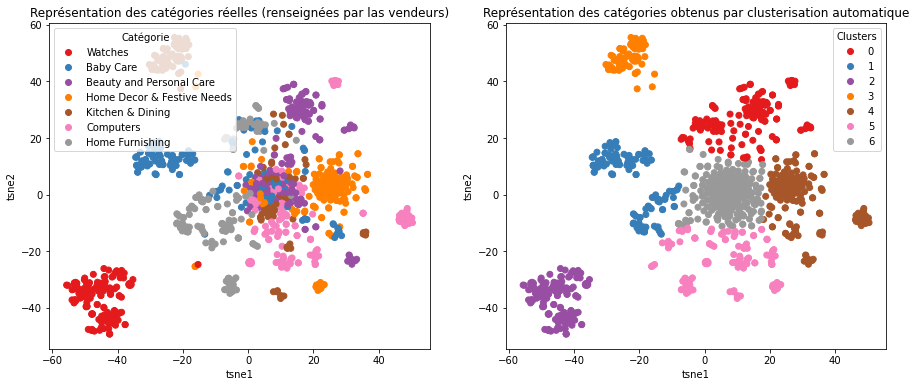

ARI :  0.3608


In [35]:
 TSNE_visu_fct(X_tsne_1CV, y_cat_num, labels_1CV, ARI_1CV)

In [ ]:
#CountVectorizer: Uniquement sur 'description_bow_lem'.

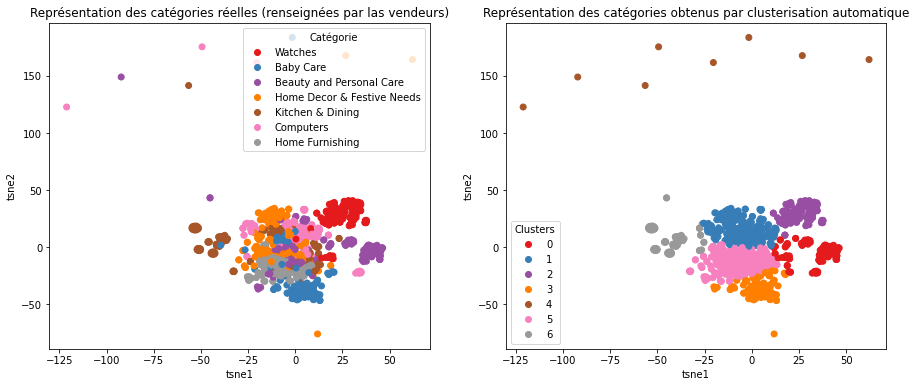

ARI :  0.3678


In [36]:
 TSNE_visu_fct(X_tsne_2CV, y_cat_num, labels_2CV, ARI_2CV)

In [ ]:
#CountVectorizer: sur 'product_name_bow_lem' et 'description_bow_lem (ie. sur 'product_description_bow_lem').

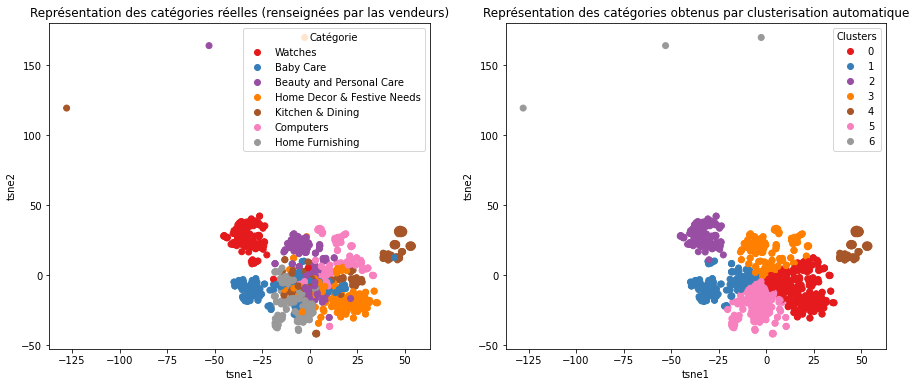

ARI :  0.399


In [37]:
 TSNE_visu_fct(X_tsne_3CV, y_cat_num, labels_3CV, ARI_3CV)

In [ ]:
#TfidfVectorizer: Uniquement sur 'product_name_bow_lem'.

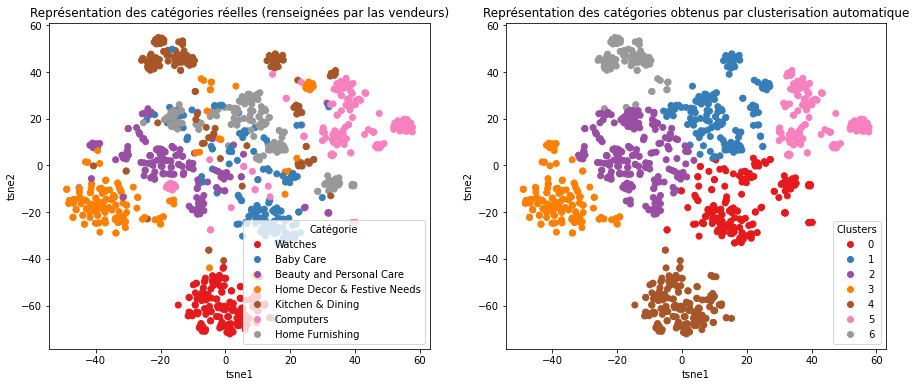

ARI :  0.5041


In [38]:
 TSNE_visu_fct(X_tsne_1TF, y_cat_num, labels_1TF, ARI_1TF)

In [ ]:
#TfidfVectorizer: Uniquement sur 'description_bow_lem'.

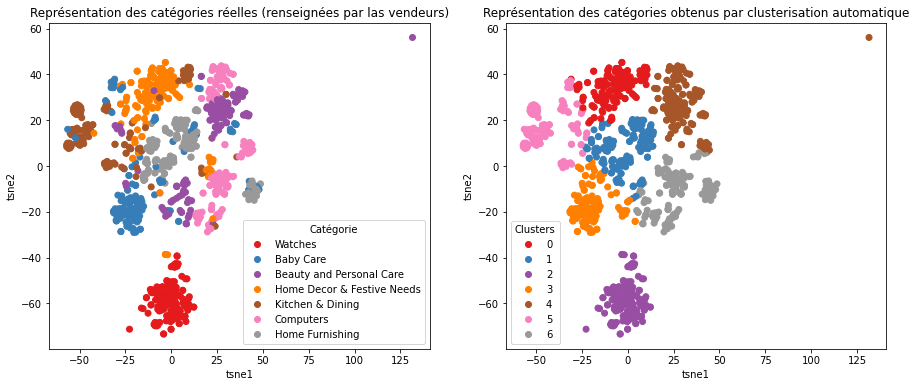

ARI :  0.5154


In [39]:
 TSNE_visu_fct(X_tsne_2TF, y_cat_num, labels_2TF, ARI_2TF)
    

In [ ]:
#TfidfVectorizer: sur 'product_name_bow_lem' et 'description_bow_lem (ie. sur 'product_description_bow_lem').

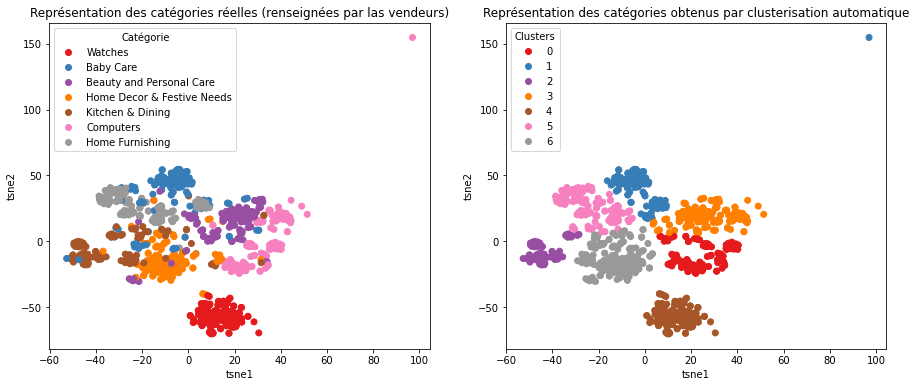

ARI :  0.5596


In [40]:
 TSNE_visu_fct(X_tsne_3TF, y_cat_num, labels_3TF, ARI_3TF)

In [ ]:
#Parmi, les approches précédentes laquelle choisir: Celle qui prend le moins de temps et où les clusters sont d'une
#part bien séparés mais aussi qui prédisent le mieux les catégories renseignées manuellement par le vendeur (ie. 
#meilleur ARI et donc le moins de différences du graphique de droite avec celui de gauche).

In [ ]:
#----------------------------------------------------------------------------------------------------------------------
#C.2 Approche de type 'word/sentence embedding'.

#Les 'sentence embeddings' sont similaires aux 'word embeddings'. On construit des vecteurs, chaque 'embedding' étant un
#vecteur de faible dimension qui représente une phrase (ou un mot) dans un format dense. Il existe plusieurs méthodes,
#ici on utilisera 3: Word2Vec, BERT et USE.

#On fait différentes combinaisons pour chaque méthode: 
        #1. Uniquement sur 'product_name_bow_lem';
        #2. Uniquement sur 'description_bow_lem';
        #3. Sur 'product_name_bow_lem' et 'description_bow_lem (ie. sur 'product_description_bow_lem').

#C.2.1 Word2Vec.

#Word2Vec est une technique de 'word/sentence embedding'. Son entrée est un corpus de texte et sa sortie est un ensemble
#de vecteurs. Il permet à des mots similaires d'avoir des dimensions similaires (vecteur associé similaire) et, par 
#conséquent, aide à apporter du contexte. Il crée des vecteurs des mots qui sont des représentations numériques 
#distribuées des caractéristiques des mots. Les intégrations de mots aident éventuellement à établir l'association d'un 
#mot avec un autre mot de sens similaire à travers les vecteurs créés. Ainsi, les mots de sens similaire sont plus 
#proches dans l'espace, indiquant leur similitude sémantique (ex: les mots femmes, hommes et humains seront regroupés 
#dans un coin, tandis que jaune, rouge et bleu seront regroupés dans un autre).

#Les paramètres:
# -min_count = On ignore tous les mots avec une fréquence absolue totale inférieure à ce chiffre.Rang (2,100).

# -window = Définit la distance maximale entre le mot actuel et le mot prédit dans une phrase. Rang: (2, 10).

# -workers = Nombre de façons dont les données vont être formées en parallèle (ie. nombre de partitions pendant la 
#            formation). Ça implique une formation plus rapide avec des machines multicœurs. Si votre système a 2 cœurs 
#            et si vous spécifiez workers=2, les données seront formées de deux manières parallèles. Worker= 1 -> pas de
#            parallélisation. Pour une exécution entièrement reproductible on doit limiter à workers=1.

# -vector_size = C'est la dimensionnalité du vecteur. Word2Vec a besoin d'exemples de texte volumineux et variés pour 
#                créer ses vecteurs d'intégration « denses » par mot.Si vous n'avez qu'un vocabulaire de 30 mots, 
#                word2vec n'est probablement pas une technologie appropriée. Et si vous essayez de l'appliquer, vous 
#                voudriez utiliser une taille de vecteur bien inférieure à la taille de votre vocabulaire pour éviter le
#               'overfitting'.

# -seed =  Starting point in generating random numbers, les vecteurs initiaux pour chaque mot sont ensemencés avec un 
#          hachage de la concaténation de word + str(seed).

# -sg= L'algorithme d'apprentissage, soit CBOW(0) soit skip gram(1). Par défaut : CBOW (continuous bag of words).

#C.2.1 Établissement des paramètres.
#a. Paramètres fixes.

In [41]:
data_T['length_product_name_bow_lem'] = data_T['product_name_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length product_name_bow_lem : ", data_T['length_product_name_bow_lem'].max()) #dit le nombre de mots.

#data_T['length_product_name_dl'] = data_T['product_name_dl'].apply(lambda x : len(word_tokenize(x)))
#print("max length product_name_dl : ", data_T['length_product_name_dl'].max())

data_T['length_description_bow_lem'] = data_T['description_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length product_bow_lem : ", data_T['length_description_bow_lem'].max()) #dit le nombre de mots.

#data_T['length_description_dl'] = data_T['description_dl'].apply(lambda x : len(word_tokenize(x)))
#print("max length product_dl : ", data_T['length_description_dl'].max())

data_T['length_product_description_bow_lem'] = data_T['product_description_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length product_description_bow_lem : ", data_T['length_product_description_bow_lem'].max()) #dit le nombre de mots.

max length product_name_bow_lem :  24
max length product_bow_lem :  379
max length product_description_bow_lem :  384


In [ ]:
#le 'maxlen' devra être adapté pour chaque cas.

In [42]:
w2v_size=300 #dimension des vecteurs associés à chaque mot (ie. de l'espace où l'on projette les mots).
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen1 = 25 # il faut adapter à la longueur de nos phrases. Nous on a vu auparavant que pour les données 'bow_lem' on avait un max de 24, 379 ou 384 selon les cas.maxlen2=380.
maxlen2=380
maxlen3=385

In [ ]:
#a. Paramètres à changer selon la combinaison

In [43]:
#1. Uniquement sur 'product_name_bow_lem'
sentences1 = data_T['product_name_bow_lem'].to_list()
sentences1 = [gensim.utils.simple_preprocess(text) for text in sentences1] #Convertir un 'document' (ie. une ligne) en une liste de tokens.

#2. Uniquement sur 'description_bow_lem'
sentences2 = data_T['description_bow_lem'].to_list()
sentences2 = [gensim.utils.simple_preprocess(text) for text in sentences2] #Convertir un 'document' (ie. une ligne) en une liste de tokens.

#3. Sur 'product_name_bow_lem' et 'description_bow_lem (ie. sur 'product_description_bow_lem')
sentences3 = data_T['product_description_bow_lem'].to_list()
sentences3 = [gensim.utils.simple_preprocess(text) for text in sentences3] #Convertir un 'document' (ie. une ligne) en une liste de tokens.


In [ ]:
#b. Création et entraînement du modèle Word2Vec.

# -.build_vocab = c'est la façon dont le modèle découvre l'ensemble de tous les mots possibles et trouve quels mots 
#                 apparaissent plus de min_count fois. Essentiel de le mettre avant '.train'.
# -.corpus_count = donne le nombre total de mots.

In [44]:
#1. Uniquement sur 'product_name_bow_lem'.
w2v_model1 = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)

w2v_model1.build_vocab(sentences1)
w2v_model1.train(sentences1, total_examples=w2v_model1.corpus_count, epochs=w2v_epochs)
model_vectors1 = w2v_model1.wv
w2v_words1 = model_vectors1.index_to_key
print("Vocabulary size: %i" % len(w2v_words1))

Vocabulary size: 1922


In [45]:
#2. Uniquement sur 'description_bow_lem'.
w2v_model2 = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)

w2v_model2.build_vocab(sentences2)
w2v_model2.train(sentences2, total_examples=w2v_model2.corpus_count, epochs=w2v_epochs)
model_vectors2 = w2v_model2.wv
w2v_words2 = model_vectors2.index_to_key
print("Vocabulary size: %i" % len(w2v_words2))

Vocabulary size: 4712


In [46]:
#3. Sur 'product_name_bow_lem' et 'description_bow_lem (ie. sur 'product_description_bow_lem').
w2v_model3= gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)

w2v_model3.build_vocab(sentences2)
w2v_model3.train(sentences3, total_examples=w2v_model3.corpus_count, epochs=w2v_epochs)
model_vectors3 = w2v_model3.wv
w2v_words3 = model_vectors3.index_to_key
print("Vocabulary size: %i" % len(w2v_words2))

Vocabulary size: 4712


In [ ]:
#c. Préparation des sentences (tokenisation).

In [47]:
#1. Uniquement sur 'product_name_bow_lem'.
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(sentences1)
x_sentences1 = pad_sequences(tokenizer1.texts_to_sequences(sentences1),
                                                     maxlen=maxlen1,
                                                     padding='post') 
                                                   
num_words1 = len(tokenizer1.word_index) + 1
print("Number of unique words: %i" % num_words1)

Number of unique words: 1923


In [48]:
#2. Uniquement sur 'description_bow_lem'.
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(sentences2)
x_sentences2 = pad_sequences(tokenizer2.texts_to_sequences(sentences2),
                                                     maxlen=maxlen2,
                                                     padding='post') 
                                                   
num_words2 = len(tokenizer2.word_index) + 1
print("Number of unique words: %i" % num_words2)

Number of unique words: 4713


In [49]:
#3. Sur 'product_name_bow_lem' et 'description_bow_lem (ie. sur 'product_description_bow_lem').
tokenizer3 = Tokenizer()
tokenizer3.fit_on_texts(sentences3)
x_sentences3 = pad_sequences(tokenizer3.texts_to_sequences(sentences3),
                                                     maxlen=maxlen3,
                                                     padding='post') 
                                                   
num_words3 = len(tokenizer3.word_index) + 1
print("Number of unique words: %i" % num_words3)

Number of unique words: 4713


In [ ]:
# d. Création de la matrice d'embedding.

#Quand on cherche a représenter un mot dans un espace, en règle générale, nous utilisons quelque chose comme 300 
#dimensions. Ainsi, tous les mots correspondent à un point dans cet hyperespace 300D et sont définis par 300 nombres. 
#On appele les 300 nombres qui identifient un mot donné un 'embedding' pour ce mot. Les relations (le sens) entre les 
#mots peuvent être représentées en comparant les 'embeddings' des mots.

#Une 'embedding matrix' est une liste de tous les mots et de leurs 'embeddings' correspondants. Dans cette matrice 
#chaque ligne correspond à un mot et chaque colonne correspond à une dimension (axe). En règle générale, nous stockons 
#l'info de manière dense: nous avons une liste de mots et d'ID de ligne qui correspondent à la ligne correspondante au 
#mot dans' l'embedding matrix'.
#Ex: { hello: 0, there: 1, texas: 2, world: 3, … } -> signifiant que le embedding de 'hello' est ligne 0 de la matrice,
#le embedding de 'there' est ligne 1 de la matrice...

#Note: Si notre 'embedding matrix' a été entraînée avec succès, les synonymes devraient apparaître plus proches les uns 
#des autres.

In [50]:
#1. Uniquement sur 'product_name_bow_lem'.
word_index1 = tokenizer1.word_index
vocab_size1 = len(word_index1) + 1
embedding_matrix1 = np.zeros((vocab_size1, w2v_size))
i=0
j=0
    
for word, idx in word_index1.items():
    i +=1
    if word in w2v_words1:
        j +=1
        embedding_vector1 = model_vectors1[word]
        if embedding_vector1 is not None:
            embedding_matrix1[idx] = model_vectors1[word]
            
word_rate1 = np.round(j/i,4) #Si=1 tous les "word" tous les mots tokenisés sont dans la liste résultant du modèle.
print("Word embedding rate : ", word_rate1)
print("Embedding matrix: %s" % str(embedding_matrix1.shape))#donne nombre de mots (lignes) et nombre de dimensions.

Word embedding rate :  1.0
Embedding matrix: (1923, 300)


In [51]:
#2. Uniquement sur 'description_bow_lem'.
word_index2 = tokenizer2.word_index
vocab_size2 = len(word_index2) + 1
embedding_matrix2 = np.zeros((vocab_size2, w2v_size))
i=0
j=0
    
for word, idx in word_index2.items():
    i +=1
    if word in w2v_words2:
        j +=1
        embedding_vector2 = model_vectors2[word]
        if embedding_vector2 is not None:
            embedding_matrix2[idx] = model_vectors2[word]
            
word_rate2 = np.round(j/i,4) #Si=1 tous les "word" tous les mots tokenisés sont dans la liste résultant du modèle.
print("Word embedding rate : ", word_rate2)
print("Embedding matrix: %s" % str(embedding_matrix2.shape))#donne nombre de mots (lignes) et nombre de dimensions.

Word embedding rate :  1.0
Embedding matrix: (4713, 300)


In [52]:
#3. Sur 'product_name_bow_lem' et 'description_bow_lem (ie. sur 'product_description_bow_lem').
word_index3 = tokenizer3.word_index
vocab_size3 = len(word_index3) + 1
embedding_matrix3 = np.zeros((vocab_size3, w2v_size))
i=0
j=0
    
for word, idx in word_index3.items():
    i +=1
    if word in w2v_words3:
        j +=1
        embedding_vector3 = model_vectors3[word]
        if embedding_vector3 is not None:
            embedding_matrix3[idx] = model_vectors3[word]
            
word_rate3 = np.round(j/i,4) #Si=1 tous les "word" tous les mots tokenisés sont dans la liste résultant du modèle.
print("Word embedding rate : ", word_rate3)
print("Embedding matrix: %s" % str(embedding_matrix3.shape))#donne nombre de mots (lignes) et nombre de dimensions.

Word embedding rate :  1.0
Embedding matrix: (4713, 300)


In [ ]:
#e. Création du modèle embedding.

In [53]:
#1. Uniquement sur 'product_name_bow_lem'.
input1=Input(shape=(len(x_sentences1),maxlen1),dtype='float64')
word_input1=Input(shape=(maxlen1,),dtype='float64')  
word_embedding1=Embedding(input_dim=vocab_size1,
                         output_dim=w2v_size,
                         weights = [embedding_matrix1],
                         input_length=maxlen1)(word_input1)
word_vec1=GlobalAveragePooling1D()(word_embedding1)  
embed_model1 = Model([word_input1],word_vec1)

embed_model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding (Embedding)       (None, 25, 300)           576900    
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 576,900
Trainable params: 576,900
Non-trainable params: 0
_________________________________________________________________


In [54]:
#2. Uniquement sur 'description_bow_lem'.
input2=Input(shape=(len(x_sentences2),maxlen2),dtype='float64')
word_input2=Input(shape=(maxlen2,),dtype='float64')  
word_embedding2=Embedding(input_dim=vocab_size2,
                         output_dim=w2v_size,
                         weights = [embedding_matrix2],
                         input_length=maxlen2)(word_input2)
word_vec2=GlobalAveragePooling1D()(word_embedding2)  
embed_model2 = Model([word_input2],word_vec2)

embed_model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 380)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 380, 300)          1413900   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


In [55]:
#3. Sur 'product_name_bow_lem' et 'description_bow_lem (ie. sur 'product_description_bow_lem').
input3=Input(shape=(len(x_sentences3),maxlen3),dtype='float64')
word_input3=Input(shape=(maxlen3,),dtype='float64')  
word_embedding3=Embedding(input_dim=vocab_size3,
                         output_dim=w2v_size,
                         weights = [embedding_matrix3],
                         input_length=maxlen3)(word_input3)
word_vec3=GlobalAveragePooling1D()(word_embedding3)  
embed_model3 = Model([word_input3],word_vec3)

embed_model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 385)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 385, 300)          1413900   
                                                                 
 global_average_pooling1d_2   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#f. Exécution du modèle, calcul de l'ARI et graphiques.

In [56]:
#1. Uniquement sur 'product_name_bow_lem'.
embeddings1 = embed_model1.predict(x_sentences1)
embeddings1.shape

33/33 [==============================] - 0s 837us/step


(1050, 300)

In [57]:
ARI1, X_tsne1, labels1 = ARI_fct(embeddings1,y_cat_num)

ARI :  0.4938 time :  10.0


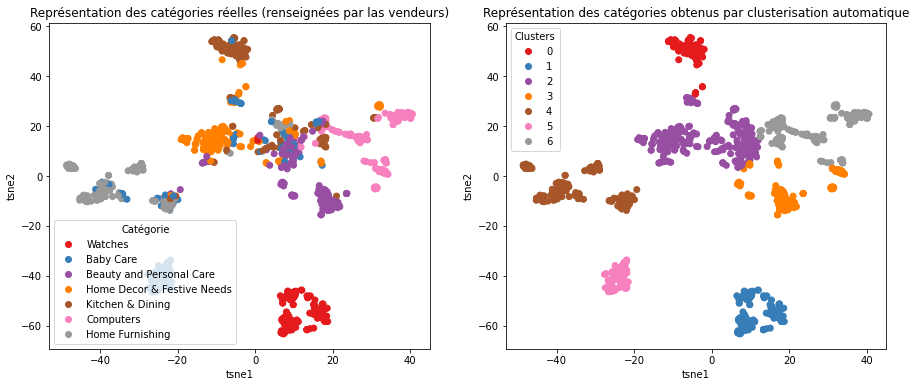

ARI :  0.4938


In [58]:
TSNE_visu_fct(X_tsne1, y_cat_num, labels1, ARI1)

In [59]:
#2. Uniquement sur 'description_bow_lem'.
embeddings2 = embed_model2.predict(x_sentences2)
embeddings2.shape

33/33 [==============================] - 0s 4ms/step


(1050, 300)

In [60]:
ARI2, X_tsne2, labels2 = ARI_fct(embeddings2,y_cat_num)

ARI :  0.3222 time :  10.0


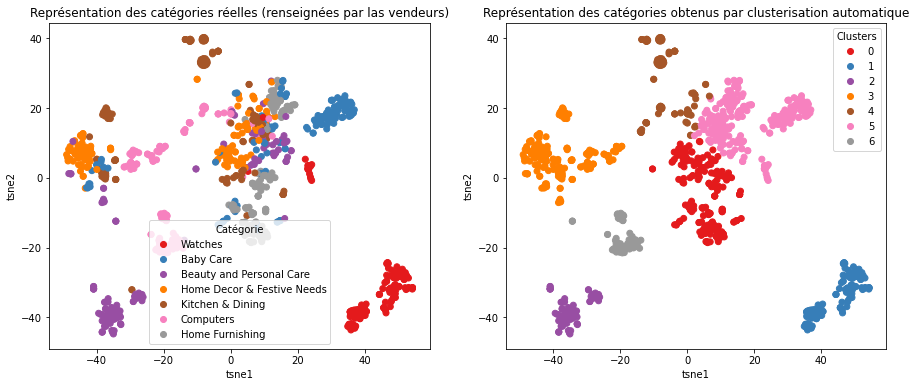

ARI :  0.3222


In [61]:
TSNE_visu_fct(X_tsne2, y_cat_num, labels2, ARI2)

In [62]:
#3. Sur 'product_name_bow_lem' et 'description_bow_lem (ie. sur 'product_description_bow_lem').
embeddings3 = embed_model3.predict(x_sentences3)
embeddings3.shape

33/33 [==============================] - 0s 5ms/step


(1050, 300)

In [63]:
ARI3, X_tsne3, labels3 = ARI_fct(embeddings3,y_cat_num)

ARI :  0.3263 time :  11.0


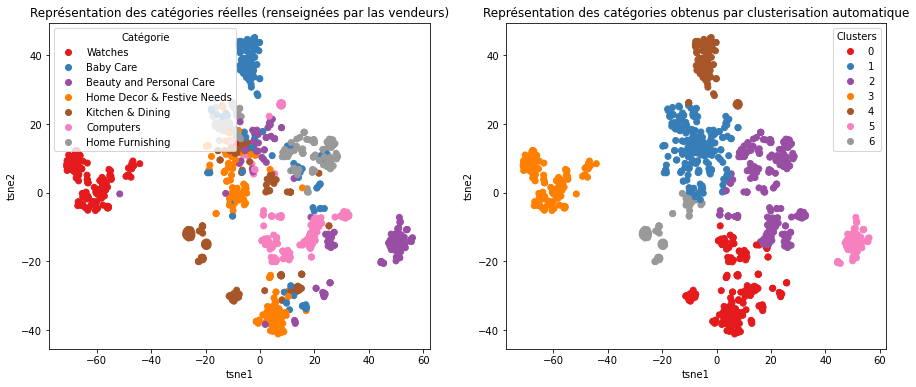

ARI :  0.3263


In [64]:
TSNE_visu_fct(X_tsne3, y_cat_num, labels3, ARI3)

In [ ]:
#---------------------------------------
#C.2.2 BERT.

#Des modèles comme word2vec mappent chaque mot sur un vecteur, qui ne représente qu'une dimension, un ruban, de la 
#signification de ce mot.Ils nécessitent de grands ensembles de données étiquetées. Bien qu'ils soient aptes à de 
#nombreuses tâches ils échouent à la nature prédictive et contextuelle de la réponse aux questions, car tous les mots 
#sont en quelque sorte fixés à un vecteur ou à une signification. BERT utilise une méthode de modélisation du langage 
#masqué pour empêcher le mot de se "voir" (ie. d'avoir une signification fixe indépendante de son contexte), étant alors
#obligé d'identifier le mot masqué en se basant uniquement sur le contexte. Dans BERT, les mots sont définis par leur 
#environnement, et non par une identité préfixée (ie."Vous connaîtrez un mot par la compagnie qu'il garde").

#On peut utiliser BERT depuis les modules:'transformers' (de hugging face) ou 'tensorflow_hub'. La différence c'est que
#'hub' peut avoir plus de modèles déjà entraînés pour quelque chose de semblable à notre besoin. 
#Nous on utilisera un BERT de 'transformers' (de hugging face), avec  'base-uncased' c'est à dire un BERT général pour 
#nos trois approches.

#Notes:
#- batch_size= définit le nombre d'échantillons que nous allons prendre pour que le modèle apprenne. Imaginons qu'on a 
#              1050 'sentences' si batch_size=100 on prendra les 100 premier, pour un premier training; puis les 100 
#              deuxièmes etc, jusqu'à atteindre les 1050 'sentences'.
#- attention_mask= utilisé lors du regroupement de séquences il indique quels tokens doivent être pris en compte et 
#                  lesquels ne doivent pas l'être. (C'est le principe de BERT).
#- input_ids= les ID d'input.
#- token_type_ids= les ID transformés en token type.

In [ ]:
#a. Fonctions générales:

In [65]:
# Fonction de préparation des sentences.
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True,
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
        
        #ajoute les resultats a nos listes vides.
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features.
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace.
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub.
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [ ]:
#b.Paramètres fixes:

#On utilise ici les données de pré-traitées mais sans passer les traitement des Stop_words (ie. les mots inutiles) ni 
#de Lemmatizer (qui joint des mots similaires pour les analyser ensemble), car le principe de BERT est de considérer 
#les mots dans son contexte.

#b.1 Création de la variable 'product_description_dl':       

In [66]:
data_T['product_description_dl']=data_T['product_name_dl']+ ' ' +data_T['description_dl']

data_T.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_name_bow_lem,product_name_dl,description_bow_lem,description_dl,main_category,product_description_bow_lem,length_product_name_bow_lem,length_description_bow_lem,length_product_description_bow_lem,product_description_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,Home Furnishing,elegance polyester multicolor abstract eyelet ...,7,156,163,elegance polyester multicolor abstract eyelet ...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,sathiyas cotton bath towel,sathiyas cotton bath towel,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,Baby Care,sathiyas cotton bath towel specification sathi...,4,63,67,sathiyas cotton bath towel specifications of s...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,eurospa cotton terry face towel set,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,Baby Care,eurospa cotton terry face towel set key featur...,6,158,164,eurospa cotton terry face towel set key featur...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,Home Furnishing,santosh royal fashion cotton printed king size...,9,114,123,santosh royal fashion cotton printed king size...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,Home Furnishing,jaipur print cotton floral king sized double b...,8,156,164,jaipur print cotton floral king sized double b...


In [67]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)

#1. Uniquement sur 'product_name_dl'.
sentences1 = data_T['product_name_dl'].to_list()

#2. Uniquement sur 'description_dl'.
sentences2 = data_T['description_dl'].to_list()

#3. Sur 'product_name_dl' et 'description_dl (ie. sur 'product_description_dl').
sentences3 = data_T['product_description_dl'].to_list()

In [ ]:
#d. Création des features.

In [68]:
#1. Uniquement sur 'product_name_dl'.
features_bert1, last_hidden_states_tot1 = feature_BERT_fct(model, model_type, sentences1, max_length, batch_size, mode='HF')

#2. Uniquement sur 'description_dl'.
features_bert2, last_hidden_states_tot2 = feature_BERT_fct(model, model_type, sentences2, max_length, batch_size, mode='HF')

#3. Sur 'product_name_dl' et 'description_dl (ie. sur 'product_description_dl').
features_bert3, last_hidden_states_tot3 = feature_BERT_fct(model, model_type, sentences3, max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 672ms/step
temps traitement :  87.0
1/1 [==============================] - 1s 521ms/step


1/1 [==============================] - 1s 501ms/step
temps traitement :  60.0
1/1 [==============================] - 1s 647ms/step


1/1 [==============================] - 1s 630ms/step
temps traitement :  75.0


In [ ]:
#e. Calculs des ARI.

In [69]:
print("BERT : ")
print("-----------------")
print("Uniquement sur 'product_name_dl':")
ARI_1B, X_tsne_1B, labels_1B = ARI_fct(features_bert1,y_cat_num)
print("Uniquement sur 'description_dl':")
ARI_2B, X_tsne_2B, labels_2B = ARI_fct(features_bert2,y_cat_num)
print("Sur 'product_name_dl' et 'description_dl:")
ARI_3B, X_tsne_3B, labels_3B = ARI_fct(features_bert3,y_cat_num)


BERT : 
-----------------
Uniquement sur 'product_name_dl':
ARI :  0.582 time :  9.0
Uniquement sur 'description_dl':
ARI :  0.3252 time :  7.0
Sur 'product_name_dl' et 'description_dl:
ARI :  0.4255 time :  8.0


In [ ]:
#f. Graphiques.

#BERT: Uniquement sur 'product_name_dl'.

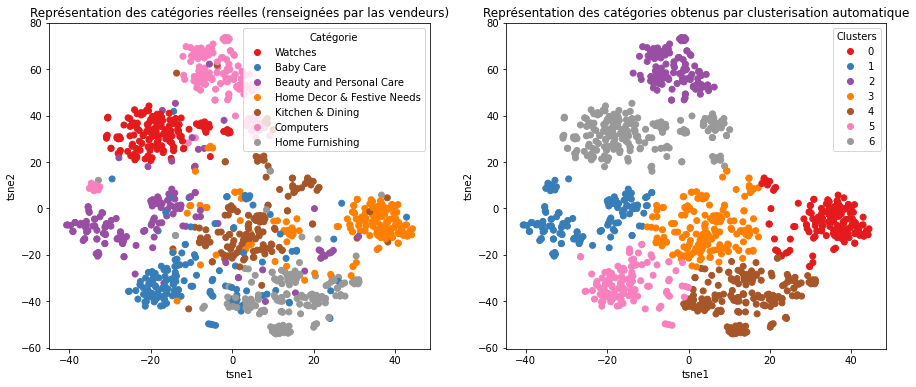

ARI :  0.582


In [70]:
TSNE_visu_fct(X_tsne_1B, y_cat_num, labels_1B, ARI_1B)

In [ ]:
#BERT: Uniquement sur 'description_dl'.

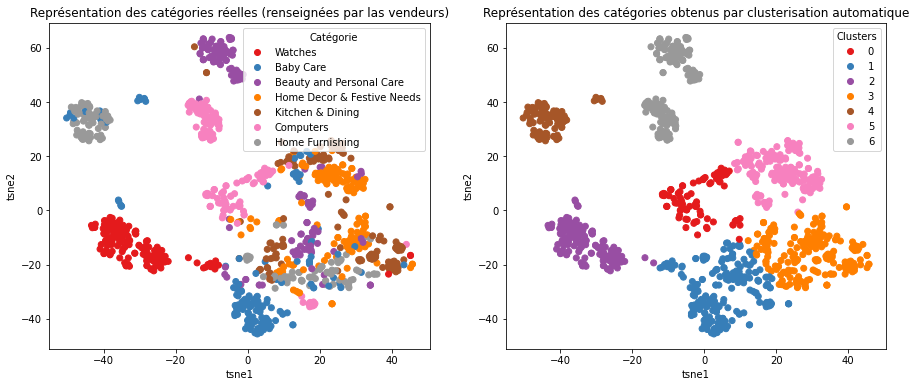

ARI :  0.3252


In [71]:
TSNE_visu_fct(X_tsne_2B, y_cat_num, labels_2B, ARI_2B)

In [ ]:
#BERT: Sur 'product_name_dl' et 'description_dl (ie. sur 'product_description_dl').

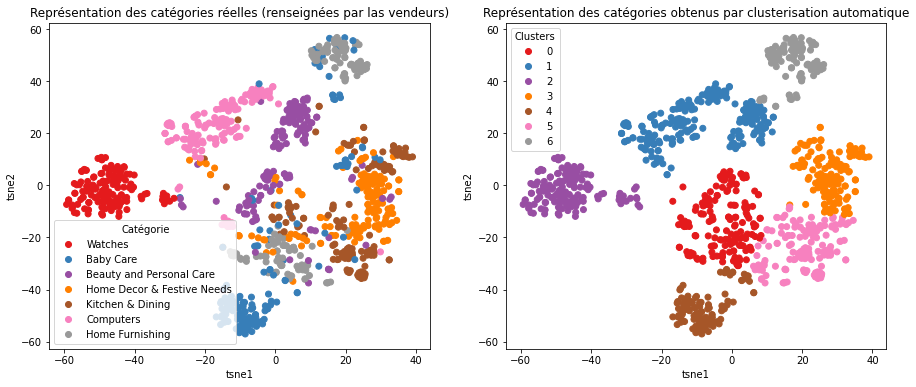

ARI :  0.4255


In [72]:
TSNE_visu_fct(X_tsne_3B, y_cat_num, labels_3B, ARI_3B)

In [ ]:
#---------------------------------------
#C.2.3 USE (Universal Sentence Encoder).

#Le Universal Sentence Encoder (USE), encode le texte dans des vecteurs de grande dimension qui peuvent être utilisés 
#pour la classification de texte, la similarité sémantique, le regroupement et d'autres tâches en langage naturel.

#Contrairement à Word2Vec, un peu comme BERT, USE inclut le contexte entier de la phrase dans la création des vecteur.

In [73]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
True


In [74]:
import tensorflow_hub as hub

embed = hub.load("..\\Data\\use")

In [ ]:
#a. Fonction générale:

In [75]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [ ]:
#On utilise ici les données de pré-traitées mais sans passer les traitement des Stop_words (ie. les mots inutiles) ni 
#de Lemmatizer (qui joint des mots similaires pour les analyser ensemble), car le principe de USE est de considérer les 
#mots dans son contexte (comme pour BERT).

#Note: On a 1050 sentences du coup un 'batch_size' de 10 est correct car 1050 est divisible par 10.

In [76]:
batch_size = 10

In [77]:
#USE: Uniquement sur 'product_name_dl'.
sentences1 = data_T['product_name_dl'].to_list()

In [78]:
features_USE1= feature_USE_fct(sentences1, batch_size)

In [79]:
ARI1, X_tsne1, labels1 = ARI_fct(features_USE1,y_cat_num)

ARI :  0.6426 time :  7.0


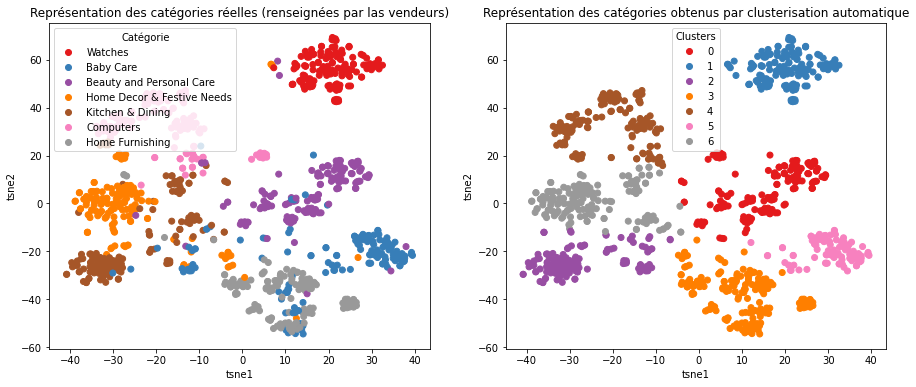

ARI :  0.6426


In [80]:
TSNE_visu_fct(X_tsne1, y_cat_num, labels1, ARI1)

In [81]:
#uSE: Uniquement sur 'description_dl'.
sentences2 = data_T['description_dl'].to_list()

In [82]:
features_USE2 = feature_USE_fct(sentences2, batch_size)

In [83]:
ARI2, X_tsne2, labels2 = ARI_fct(features_USE2,y_cat_num)

ARI :  0.4322 time :  8.0


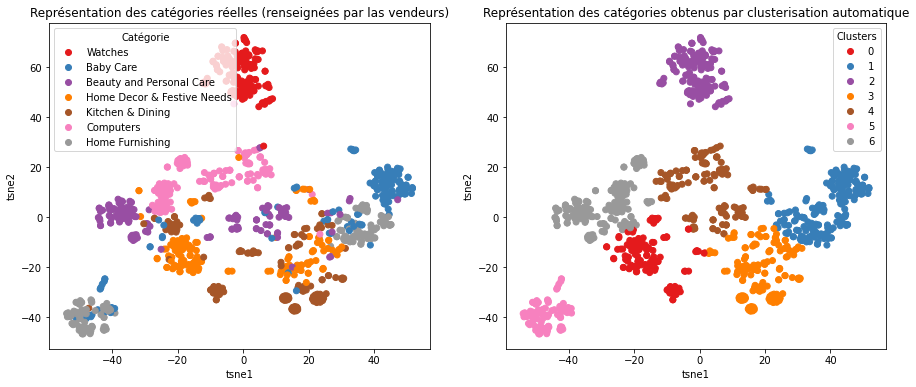

ARI :  0.4322


In [84]:
TSNE_visu_fct(X_tsne2, y_cat_num, labels2, ARI2)

In [85]:
#USE: Sur 'product_name_dl' et 'description_dl (ie. sur 'product_description_dl').
sentences3 = data_T['product_description_dl'].to_list()

In [86]:
features_USE3 = feature_USE_fct(sentences3, batch_size)

In [87]:
ARI3, X_tsne3, labels3 = ARI_fct(features_USE3,y_cat_num)

ARI :  0.4332 time :  9.0


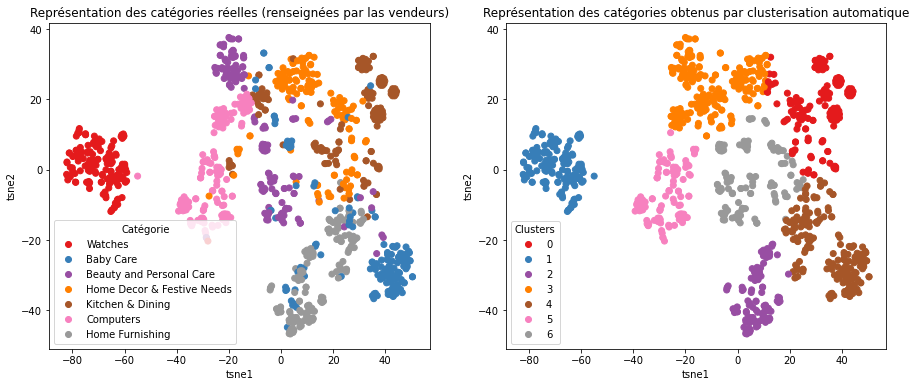

ARI :  0.4332


In [88]:
TSNE_visu_fct(X_tsne3, y_cat_num, labels3, ARI3)

In [ ]:
#ATTENTION: les temps sont en secondes.

In [ ]:
#----------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------

In [ ]:
#D. TRAITEMENT DES IMAGES.

#D.1 Algorithme de type SIFT.

#ORB est l'algorithme le plus rapide tandis que SIFT est le plus performant dans la plupart des scénarios. Pour le cas 
#particulier où l'angle de rotation est proportionnel à 90 degrés, ORB et SURF surpassent SIFT et dans les images 
#bruitées, ORB et SIFT montrent des performances presque similaires.

#On fera donc un SIFT étant ce dernier le plus performant.

    #SIFT → méthode invariante par rapport à rotation et échelle. On utilisera 'cv.SIFT'.
    
    #Étapes:
    #1. Pré traitement des images.
    #Passage à l'échelle de gris (cv2.imread), et équalisation (ie. ajustement du contraste) (cv2.equalizeHist).
        #Note: cv.SIFT a besoin en entrée d'une image de 8bits en échelle de gris.
    
    #Ensuite 'sift.detectAndCompute' fait les 3 étapes suivante intrinsèques à l'algoritme STIF:
    
    #2. Détection des descripteurs. 
    #Ce sont des zones circulaires, au rayon proportionnel au facteur d'échelle, définis par ses coordonnées sur l'image 
    #et le facteur d'échelle σ de celle ci (ie. on a des vecteurs de grande dimension).Ils résultent de la convolution 
    #par filtre gaussien qui lisse l’image (DoG – Difference of Gaussians).
 
    #3. Reconvergence et de filtrage.
    #Améliore la précision sur la localisation des points-clés et élimine les non pertinents. Chaque point-clé restant 
    #est ensuite associé à une orientation intrinsèque, ne dépendant que du contenu local de l'image autour du point 
    #clé, au facteur d'échelle considéré, pour assurer l'invariance de la méthode à la rotation.

    #4. Calcul du descripteur.

#a. Création de la liste.

In [89]:
path = ".\\Images\\"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [90]:
list_photos

['009099b1f6e1e8f893ec29a7023153c4.jpg',
 '0096e89cc25a8b96fb9808716406fe94.jpg',
 '00cbbc837d340fa163d11e169fbdb952.jpg',
 '00d84a518e0550612fcfcba3b02b6255.jpg',
 '00e966a5049a262cfc72e6bbf68b80e7.jpg',
 '00ed03657cedbe4663eff2d7fa702a33.jpg',
 '01089dc3618a0ab7304d784ef400b83d.jpg',
 '0131e5d87b72877702d536299cf83b75.jpg',
 '020d2daba55a723128e4e07c0b0393a9.jpg',
 '02127f52e96fb72c66bf081d25104ef8.jpg',
 '025a85a3d1cddc6307f7dc075d8d2132.jpg',
 '02a53d335775b652f22f41b529b9d646.jpg',
 '02c63a087b298ec74042d557acf61be1.jpg',
 '031c98cfde349d99fb6d5983f54c8751.jpg',
 '032e812adcd11a38fd8b764891a852ff.jpg',
 '037b39bef3db7ccd264c577a0edf0c0a.jpg',
 '037c2402fee39fbc80433935711d1383.jpg',
 '04f9f818e2d657b873b07578cfe2eade.jpg',
 '04f9ff160a1561e3656350f4bd6b8c50.jpg',
 '050ea3acb555bf641e7ae9b4f3ba684a.jpg',
 '052559ede419996737893eb47568ee7f.jpg',
 '057836ecde71565f8ebdd576e41fdc96.jpg',
 '059493eeb88ebb4cc08d1522f3f87c3f.jpg',
 '059bc43e03e1824a9ab6466e32e5f137.jpg',
 '06749cbff1487f

In [91]:
data_T1=pd.DataFrame()
data_T1=data_T

In [92]:
data_T1['y_cat_num']=y_cat_num

In [93]:
data_T2=data_T1[['image','main_category', 'y_cat_num']]

In [94]:
d1 = pd.DataFrame()
d1['image_path']=list_photos

In [95]:
d1=pd.merge(d1,data_T2,how='left',left_on='image_path',right_on='image')

In [96]:
d1

,image_path,image,main_category,y_cat_num
0,009099b1f6e1e8f893ec29a7023153c4.jpg,009099b1f6e1e8f893ec29a7023153c4.jpg,Watches,0
1,0096e89cc25a8b96fb9808716406fe94.jpg,0096e89cc25a8b96fb9808716406fe94.jpg,Kitchen & Dining,4
2,00cbbc837d340fa163d11e169fbdb952.jpg,00cbbc837d340fa163d11e169fbdb952.jpg,Home Furnishing,6
3,00d84a518e0550612fcfcba3b02b6255.jpg,00d84a518e0550612fcfcba3b02b6255.jpg,Beauty and Personal Care,2
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,00e966a5049a262cfc72e6bbf68b80e7.jpg,Computers,5
...,...,...,...,...
1045,feefbdff924dd6b7cc266449c9a36d69.jpg,feefbdff924dd6b7cc266449c9a36d69.jpg,Kitchen & Dining,4
1046,ff24511994fc459d04145231c8876d6c.jpg,ff24511994fc459d04145231c8876d6c.jpg,Home Furnishing,6
1047,ffbf3794aa8cb6bb8d3f313d0a549a09.jpg,ffbf3794aa8cb6bb8d3f313d0a549a09.jpg,Kitchen & Dining,4
1048,ffc2e1fc7c886ec09a331040ada038aa.jpg,ffc2e1fc7c886ec09a331040ada038aa.jpg,Home Furnishing,6


In [97]:
d1.drop(['image'], axis=1)

,image_path,main_category,y_cat_num
0,009099b1f6e1e8f893ec29a7023153c4.jpg,Watches,0
1,0096e89cc25a8b96fb9808716406fe94.jpg,Kitchen & Dining,4
2,00cbbc837d340fa163d11e169fbdb952.jpg,Home Furnishing,6
3,00d84a518e0550612fcfcba3b02b6255.jpg,Beauty and Personal Care,2
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,Computers,5
...,...,...,...
1045,feefbdff924dd6b7cc266449c9a36d69.jpg,Kitchen & Dining,4
1046,ff24511994fc459d04145231c8876d6c.jpg,Home Furnishing,6
1047,ffbf3794aa8cb6bb8d3f313d0a549a09.jpg,Kitchen & Dining,4
1048,ffc2e1fc7c886ec09a331040ada038aa.jpg,Home Furnishing,6


In [98]:
d1.groupby('y_cat_num').count()

,image_path,image,main_category
y_cat_num,,,
0,150,150,150
1,150,150,150
2,150,150,150
3,150,150,150
4,150,150,150
5,150,150,150
6,150,150,150


In [ ]:
#Note: On retrouve bien les 1050 lignes de notre dataset.

In [99]:
l_cat=list(set(d1['main_category']))
l_cat

['Watches',
 'Baby Care',
 'Beauty and Personal Care',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Computers',
 'Home Furnishing']

In [ ]:
#b. Affichage des images.

In [100]:
#Obtention du nom de chaque image.
def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(d1)) if d1['main_category'][i]==name]
    return list_image_name

#Création de listes par types d'images.
list_Watches=[list_photos[i] for i in range(len(d1)) if d1['main_category'][i]=='Watches']
list_Kitchen=[list_photos[i] for i in range(len(d1)) if d1['main_category'][i]=='Kitchen & Dining']
list_Home=[list_photos[i] for i in range(len(d1)) if d1['main_category'][i]=='Home Furnishing']
list_Beauty=[list_photos[i] for i in range(len(d1)) if d1['main_category'][i]=='Beauty and Personal Care']
list_Computers=[list_photos[i] for i in range(len(d1)) if d1['main_category'][i]=='Computers']
list_Decor=[list_photos[i] for i in range(len(d1)) if d1['main_category'][i]=='Home Decor & Festive Needs']
list_Baby=[list_photos[i] for i in range(len(d1)) if d1['main_category'][i]=='Baby Care']



Watches


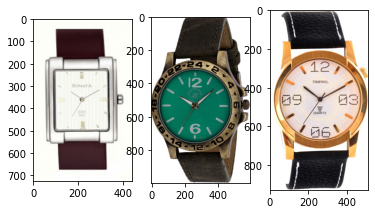

Baby Care


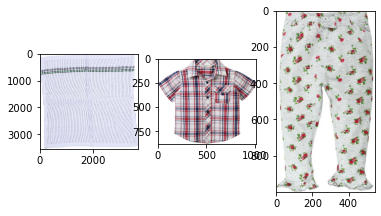

Beauty and Personal Care


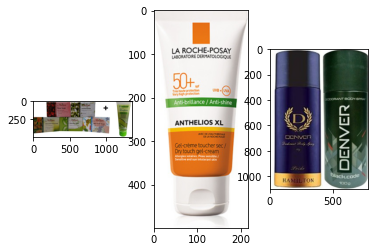

Home Decor & Festive Needs


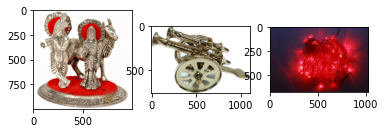

Kitchen & Dining


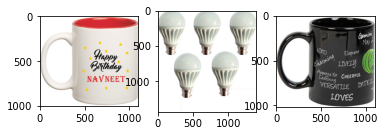

Computers


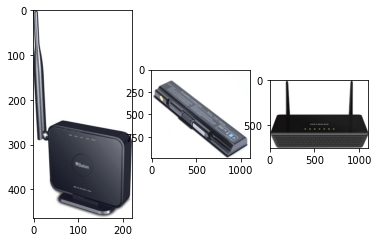

Home Furnishing


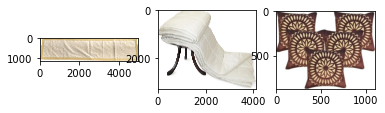

In [101]:
for name in l_cat :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [ ]:
#c. Descripteurs SIFT: détermination et affichage.

#c.1 Sur un exemple.

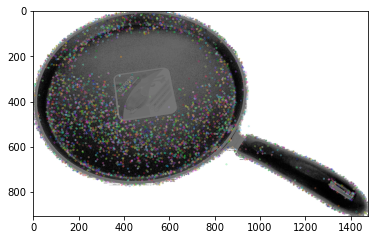

Descripteurs :  (4656, 128)

[[ 4.  2.  6. ...  5.  0.  0.]
 [96. 20.  0. ...  9.  2.  0.]
 [55. 16.  0. ...  0.  1.  0.]
 ...
 [12.  0.  0. ...  0.  0.  0.]
 [67. 19.  5. ...  0. 34. 13.]
 [ 0.  5. 27. ...  0.  0.  0.]]


In [102]:
sift = cv2.SIFT_create() 
image = cv2.imread(path+list_photos[1],0) #convertit à échelle de gris.
image = cv2.equalizeHist(image)   #équalise l'histogramme de l'image.
kp, des = sift.detectAndCompute(image, None) #obtention des descripteurs par l'algorithme STIF.
img=cv2.drawKeypoints(image,kp,image) #dessine les descripteurs sur l'image.
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [ ]:
#Pour cette image on a 4656 descripteurs qui sont des vecteurs de 128 dimensions.

#c.2 Sur l'ensemble des images.

#On va répéter l'opération pour chaque image (ie. passage en gris, équalisation et obtention des descripteurs), en 
#limitant le nombre de descripteurs par image à 500 (pour avoir uniquement les plus remarquables).
#Le but est d'obtenir: 
    #-Une liste de descripteurs par image ("sift_keypoints_by_img"), à utiliser pour réaliser les histogrammes par 
    # image.
    #-Une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") à utiliser pour créer les clusters de 
    # descripteurs.

In [103]:
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500) #On limite de nombre de descripteurs à 500, pour prendre les plus importants.

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) #convertit à échelle de gris.
    res = cv2.equalizeHist(image)   #équalise l'histogramme de l'image.
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints) #liste de descripteurs par image.
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0) #liste de descripteurs pour l'ensemble des images.

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)



Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           317.48 secondes


In [104]:
sift_keypoints_all.shape

(517351, 128)

In [105]:
print(sift_keypoints_all)

[[ 8.  8. 10. ...  4.  1.  3.]
 [ 0. 10. 49. ...  0.  0.  1.]
 [10. 11.  5. ...  1.  0.  0.]
 ...
 [47. 11.  4. ...  1.  1. 27.]
 [ 8. 14. 17. ...  0.  0.  2.]
 [80. 77.  0. ...  6.  1.  5.]]


In [ ]:
#Notez que le temps de calcul est de 9,6 minutes environ.

#d. Création des clusters de descripteurs.

#On utilise MiniBatchKMeans pour des résultat plus rapides qu'avec K-means. Notez que les différence sont moindres
#c'est juste que MiniBatchKMeans utilise de petits lots de données aléatoires de taille fixe à stocker en mémoire, puis 
#à chaque itération, un échantillon aléatoire des données est collecté et utilisé pour mettre à jour les clusters.

In [106]:
# Détermination du nombre de clusters.
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0)) #On utilise cette méthode et pas l'elbow, car l'elbow n'est pas toujours efficace surtout quand on a beaucoup de points.
print("Nombre de clusters optimal: ", k)

# Clustering.
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters optimal:  719


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


temps de traitement kmeans :            43.94 secondes


In [ ]:
#e. Création des features (ie. variables caractéristiques) des images.

#Pour chaque image on crée un histogramme qui montre le nombre de descripteurs par clusters.

In [107]:
# Création des histogrammes (ie. des features de chaque image).
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Création d'une matrice d'histogrammes.
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calcule l'histogramme.
    hist_vectors.append(hist) #l'histogramme est le 'feature vector'.

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             2.58 secondes


In [ ]:
#Dimension du dataset (ie. features des images).

In [108]:
im_features.shape

(1050, 719)

In [ ]:
#Notez qu'on a 719 dimensions (ie.features des images).

In [ ]:
#f. Réductions de dimension.

#f.1 PCA (decompositon - SVD).
#On fait d'abord un PCA pour que ensuite le T-SNE soit plus rapide.
#Note: On utilisera 'decomposition.PCA', ce qui signifie qu'on fera le PCA via 'singular value decomposition (SVD)', 
#pour avoir des matrices diagonalisables car c'est plus simple à manipuler et donc plus rapide.

In [109]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 499)


In [ ]:
#Notez que le PCA réduit de façon notoire le nombre de features des images.

In [ ]:
#f.2 Création des clusters à partir des TSNE, clustérisation des TSNE et graphiques.

In [110]:
ARI_im, X_tsne_im, labels_im = ARI_fct(feat_pca,d1['y_cat_num'])

ARI :  0.0478 time :  10.0


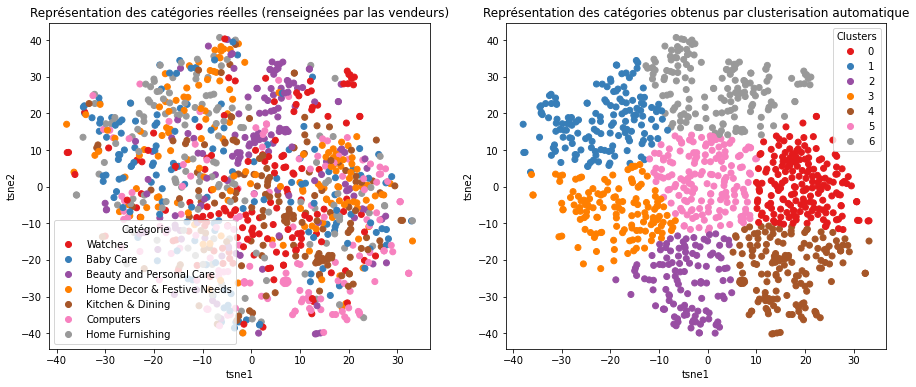

ARI :  0.0478


In [111]:
TSNE_visu_fct(X_tsne_im, d1['y_cat_num'], labels_im, ARI_im)

In [ ]:
#Notez que les clusters obtenus ne matchent pas avec les catégories déterminées manuellement par les vendeurs. C'est
#normal, en fait SIFT se base dans l'identification de points qui déterminent en quelque sorte la silhouette des objets,
#et il est impossible juste par la silhouette de définir par exemple qu'un objet est un outils pour la cuisine ou un 
#outil pour bébé. En fait, on peut avoir des objets qui ont la même silhouette, ou une silhouette très proche qui sont
#des objets à utilité et donc à catégorie complètement différente (ie. on peut avoir un objet pour la cuisine et un
#objet pour bébé dont la silhouette se ressemble).



#D.2 Algorithme de type CNN Transfer Learning.

#CNN est plus rapide et plus précis pour les bases de donées petites et moyennes, et peut facilement être étendu à 
#grande échelle, contrairement à SIFT. SIFT travaille sur des gradients et CNN plutôt sur des pixels ce qui le rend 
#plus précis.

#CNN utilise la convolution de l'image d'entrée avec un filtre (ie. un kernel) pour obtenir le 'features map'.
#Chaque image est représentée sous la forme d'une matrice 3D (ie. largeur, la hauteur et la profondeur, la profondeur 
#étant une dimension en raison des couleurs RVB utilisés dans une image).
#De nombreuses convolutions sont effectuées sur notre image, en utilisant un filtre différent à chaque fois. On 
#rassemble ensuite tous les 'features maps'.

#les quatre hyperparamètres importants sont:
    #-la taille du kernel;
    #-le nombre de filtres: combien de filtres voulons-nous utiliser;
    #-le stride: quelle est la taille des steps du filtre;
    #-le pandding.
    
    
#les modèles CNN peuvent prendre des jours, voire des semaines, pour s'entraîner sur de très grands ensembles de 
#données. Pour raccourcir ce processus on peut utiliser des 'pre-trained models' comme VGG disponible sur Keras.

#a. Accès au dossier des images.

In [112]:
pwd

"C:\\Users\\'titite\\Desktop\\Data Science candidature\\Projets\\Projet 6\\Data"

In [113]:
cd Images

C:\Users\'titite\Desktop\Data Science candidature\Projets\Projet 6\Data\Images


In [ ]:
#b. Chargement des images (version1).
#image = load_img(list_photos[1], target_size=(224, 224))
#image

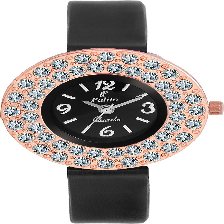

In [114]:
#b. Chargement des images (version2).
image = load_img(d1.loc[0,'image_path'], target_size=(224, 224))
image

In [ ]:
#c. Chargement et préparation des images, et obtention des features avec le modèle VGG.

In [115]:
features_toto = []
for i in range(len(d1)):
    
    # 1. Chargement des images.
    image = load_img(d1['image_path'][i], target_size=(224, 224))

    # 2. Conversion des pixels de l'image en 'numpy array'.
    image = img_to_array(image)
    
    # 3. Remodélisation les données du modèle.
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    
    # 4. Préparation les images pour le modèle VGG.
    image = preprocess_input(image)
    
    # 5. Chargement du modèle.
    model = VGG16()
    
    # 6. Suppression de la couche de sortie.
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    
    # 7. Obtention des 'extracted features'.
    features= model.predict(image)
    
    features_toto.append(features)
    print(features.shape)

features_all = np.concatenate(np.asarray(features_toto), axis=0) #liste de descripteurs pour l'ensemble des images.

1/1 [==============================] - 0s 305ms/step
(1, 4096)
1/1 [==============================] - 0s 215ms/step
(1, 4096)
1/1 [==============================] - 0s 219ms/step
(1, 4096)
1/1 [==============================] - 0s 214ms/step
(1, 4096)
1/1 [==============================] - 0s 195ms/step
(1, 4096)
1/1 [==============================] - 0s 203ms/step
(1, 4096)
1/1 [==============================] - 0s 207ms/step
(1, 4096)
1/1 [==============================] - 0s 217ms/step
(1, 4096)
1/1 [==============================] - 0s 216ms/step
(1, 4096)
1/1 [==============================] - 0s 197ms/step
(1, 4096)
1/1 [==============================] - 0s 193ms/step
(1, 4096)
1/1 [==============================] - 0s 234ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 209ms/step
(1, 4096)
1/1 [==============================] - 0s 204ms/step
(1, 4096)
1/1 [==============================] - 0s 195ms/step
(1

1/1 [==============================] - 0s 236ms/step
(1, 4096)
1/1 [==============================] - 0s 360ms/step
(1, 4096)
1/1 [==============================] - 0s 331ms/step
(1, 4096)
1/1 [==============================] - 0s 313ms/step
(1, 4096)
1/1 [==============================] - 0s 236ms/step
(1, 4096)
1/1 [==============================] - 0s 268ms/step
(1, 4096)
1/1 [==============================] - 0s 257ms/step
(1, 4096)
1/1 [==============================] - 0s 348ms/step
(1, 4096)
1/1 [==============================] - 0s 221ms/step
(1, 4096)
1/1 [==============================] - 0s 339ms/step
(1, 4096)
1/1 [==============================] - 0s 431ms/step
(1, 4096)
1/1 [==============================] - 0s 346ms/step
(1, 4096)
1/1 [==============================] - 0s 260ms/step
(1, 4096)
1/1 [==============================] - 0s 238ms/step
(1, 4096)
1/1 [==============================] - 0s 249ms/step
(1, 4096)
1/1 [==============================] - 0s 256ms/step
(1

1/1 [==============================] - 0s 307ms/step
(1, 4096)
1/1 [==============================] - 0s 259ms/step
(1, 4096)
1/1 [==============================] - 0s 258ms/step
(1, 4096)
1/1 [==============================] - 0s 288ms/step
(1, 4096)
1/1 [==============================] - 0s 271ms/step
(1, 4096)
1/1 [==============================] - 0s 258ms/step
(1, 4096)
1/1 [==============================] - 0s 318ms/step
(1, 4096)
1/1 [==============================] - 0s 268ms/step
(1, 4096)
1/1 [==============================] - 0s 271ms/step
(1, 4096)
1/1 [==============================] - 4s 4s/step
(1, 4096)
1/1 [==============================] - 0s 297ms/step
(1, 4096)
1/1 [==============================] - 0s 290ms/step
(1, 4096)
1/1 [==============================] - 0s 257ms/step
(1, 4096)
1/1 [==============================] - 0s 254ms/step
(1, 4096)
1/1 [==============================] - 0s 207ms/step
(1, 4096)
1/1 [==============================] - 0s 202ms/step
(1, 4

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 206ms/step
(1, 4096)
1/1 [==============================] - 0s 195ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 221ms/step
(1, 4096)
1/1 [==============================] - 0s 195ms/step
(1, 4096)
1/1 [==============================] - 0s 213ms/step
(1, 4096)
1/1 [==============================] - 0s 202ms/step
(1, 4096)
1/1 [==============================] - 0s 215ms/step
(1, 4096)
1/1 [==============================] - 0s 206ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 250ms/step
(1, 4096)
1/1 [==============================] - 0s 232ms/step
(1, 4096)
1/1 [==============================] - 0s 324ms/step
(1, 4096)
1/1 [==============================] - 0s 303ms/step
(1, 4096)
1/1 [==============================] - 0s 248ms/step
(1, 4096)
1/1 [==============================] - 0s 272ms/step
(1

1/1 [==============================] - 0s 240ms/step
(1, 4096)
1/1 [==============================] - 0s 333ms/step
(1, 4096)
1/1 [==============================] - 0s 300ms/step
(1, 4096)
1/1 [==============================] - 0s 246ms/step
(1, 4096)
1/1 [==============================] - 0s 324ms/step
(1, 4096)
1/1 [==============================] - 0s 258ms/step
(1, 4096)
1/1 [==============================] - 0s 270ms/step
(1, 4096)
1/1 [==============================] - 0s 280ms/step
(1, 4096)
1/1 [==============================] - 0s 269ms/step
(1, 4096)
1/1 [==============================] - 0s 299ms/step
(1, 4096)
1/1 [==============================] - 0s 290ms/step
(1, 4096)
1/1 [==============================] - 0s 304ms/step
(1, 4096)
1/1 [==============================] - 0s 346ms/step
(1, 4096)
1/1 [==============================] - 1s 731ms/step
(1, 4096)
1/1 [==============================] - 0s 301ms/step
(1, 4096)
1/1 [==============================] - 0s 281ms/step
(1

1/1 [==============================] - 0s 275ms/step
(1, 4096)
1/1 [==============================] - 0s 263ms/step
(1, 4096)
1/1 [==============================] - 0s 246ms/step
(1, 4096)
1/1 [==============================] - 0s 266ms/step
(1, 4096)
1/1 [==============================] - 0s 261ms/step
(1, 4096)
1/1 [==============================] - 0s 259ms/step
(1, 4096)
1/1 [==============================] - 0s 268ms/step
(1, 4096)
1/1 [==============================] - 0s 323ms/step
(1, 4096)
1/1 [==============================] - 0s 277ms/step
(1, 4096)
1/1 [==============================] - 0s 271ms/step
(1, 4096)
1/1 [==============================] - 0s 276ms/step
(1, 4096)
1/1 [==============================] - 0s 260ms/step
(1, 4096)
1/1 [==============================] - 0s 291ms/step
(1, 4096)
1/1 [==============================] - 0s 286ms/step
(1, 4096)
1/1 [==============================] - 0s 237ms/step
(1, 4096)
1/1 [==============================] - 0s 324ms/step
(1

1/1 [==============================] - 0s 277ms/step
(1, 4096)
1/1 [==============================] - 0s 254ms/step
(1, 4096)
1/1 [==============================] - 0s 248ms/step
(1, 4096)
1/1 [==============================] - 0s 239ms/step
(1, 4096)
1/1 [==============================] - 0s 236ms/step
(1, 4096)
1/1 [==============================] - 0s 258ms/step
(1, 4096)
1/1 [==============================] - 0s 331ms/step
(1, 4096)
1/1 [==============================] - 0s 249ms/step
(1, 4096)
1/1 [==============================] - 0s 252ms/step
(1, 4096)
1/1 [==============================] - 0s 309ms/step
(1, 4096)
1/1 [==============================] - 0s 226ms/step
(1, 4096)
1/1 [==============================] - 0s 299ms/step
(1, 4096)
1/1 [==============================] - 0s 324ms/step
(1, 4096)
1/1 [==============================] - 0s 302ms/step
(1, 4096)
1/1 [==============================] - 0s 235ms/step
(1, 4096)
1/1 [==============================] - 0s 230ms/step
(1

1/1 [==============================] - 0s 268ms/step
(1, 4096)
1/1 [==============================] - 0s 296ms/step
(1, 4096)
1/1 [==============================] - 0s 224ms/step
(1, 4096)
1/1 [==============================] - 0s 209ms/step
(1, 4096)
1/1 [==============================] - 0s 202ms/step
(1, 4096)
1/1 [==============================] - 0s 211ms/step
(1, 4096)
1/1 [==============================] - 0s 196ms/step
(1, 4096)
1/1 [==============================] - 0s 216ms/step
(1, 4096)
1/1 [==============================] - 0s 196ms/step
(1, 4096)
1/1 [==============================] - 0s 210ms/step
(1, 4096)
1/1 [==============================] - 0s 212ms/step
(1, 4096)
1/1 [==============================] - 0s 192ms/step
(1, 4096)
1/1 [==============================] - 0s 196ms/step
(1, 4096)
1/1 [==============================] - 0s 206ms/step
(1, 4096)
1/1 [==============================] - 0s 206ms/step
(1, 4096)
1/1 [==============================] - 0s 229ms/step
(1

1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 190ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 206ms/step
(1, 4096)
1/1 [==============================] - 0s 189ms/step
(1, 4096)
1/1 [==============================] - 0s 199ms/step
(1, 4096)
1/1 [==============================] - 0s 206ms/step
(1, 4096)
1/1 [==============================] - 0s 203ms/step
(1, 4096)
1/1 [==============================] - 0s 208ms/step
(1, 4096)
1/1 [==============================] - 0s 190ms/step
(1, 4096)
1/1 [==============================] - 0s 198ms/step
(1, 4096)
1/1 [==============================] - 0s 214ms/step
(1, 4096)
1/1 [==============================] - 0s 321ms/step
(1, 4096)
1/1 [==============================] - 0s 252ms/step
(1, 4096)
1/1 [==============================] - 0s 353ms/step
(1, 4096)
1/1 [==============================] - 0s 308ms/step
(1

In [116]:
len(features_all)

1050

In [117]:
image.shape

(1, 224, 224, 3)

In [118]:
print(features_all)

[[2.592808   2.6987534  0.         ... 0.8779248  0.         2.9672081 ]
 [0.         0.         0.         ... 0.         0.16598031 2.9202013 ]
 [0.         0.         0.         ... 0.6985383  0.         0.        ]
 ...
 [0.         0.         1.4187558  ... 0.         0.         0.08535898]
 [1.0164536  1.8210585  0.         ... 0.         0.         0.        ]
 [0.9676373  6.0002785  0.         ... 0.         0.         4.0834017 ]]


In [ ]:
#d. Réductions de dimension.

#d.1 PCA (decompositon - SVD).
#On fait d'abord un PCA pour que ensuite le T-SNE soit plus rapide.
#Note: On utilisera 'decomposition.PCA', ce qui signifie qu'on fera le PCA via 'singular value décomposition (SVD)', 
#pour avoir des matrices diagonalisables car c'est plus simple à manipuler et donc plus rapide.

In [119]:
print("Dimensions dataset avant réduction PCA : ", features_all.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca_2= pca.fit_transform(features_all)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 499)


In [ ]:
#Notez que le PCA réduit de façon notoire le nombre de features des images.

In [120]:
dex=d1.head(100)

In [ ]:
#f.2 Création des clusters à partir des TSNE, clustérisation des TSNE (par K-means) et graphiques.

In [121]:
dex=d1.head(10)

In [122]:
dex

,image_path,image,main_category,y_cat_num
0,009099b1f6e1e8f893ec29a7023153c4.jpg,009099b1f6e1e8f893ec29a7023153c4.jpg,Watches,0
1,0096e89cc25a8b96fb9808716406fe94.jpg,0096e89cc25a8b96fb9808716406fe94.jpg,Kitchen & Dining,4
2,00cbbc837d340fa163d11e169fbdb952.jpg,00cbbc837d340fa163d11e169fbdb952.jpg,Home Furnishing,6
3,00d84a518e0550612fcfcba3b02b6255.jpg,00d84a518e0550612fcfcba3b02b6255.jpg,Beauty and Personal Care,2
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,00e966a5049a262cfc72e6bbf68b80e7.jpg,Computers,5
5,00ed03657cedbe4663eff2d7fa702a33.jpg,00ed03657cedbe4663eff2d7fa702a33.jpg,Computers,5
6,01089dc3618a0ab7304d784ef400b83d.jpg,01089dc3618a0ab7304d784ef400b83d.jpg,Computers,5
7,0131e5d87b72877702d536299cf83b75.jpg,0131e5d87b72877702d536299cf83b75.jpg,Kitchen & Dining,4
8,020d2daba55a723128e4e07c0b0393a9.jpg,020d2daba55a723128e4e07c0b0393a9.jpg,Beauty and Personal Care,2
9,02127f52e96fb72c66bf081d25104ef8.jpg,02127f52e96fb72c66bf081d25104ef8.jpg,Kitchen & Dining,4


In [123]:
ARI_im, X_tsne_im, labels_im = ARI_fct(feat_pca_2,d1['y_cat_num'])

ARI :  0.4731 time :  10.0


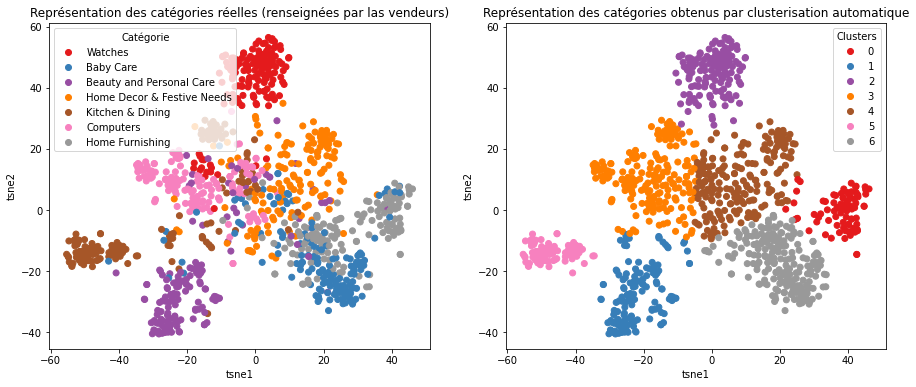

ARI :  0.4731


In [124]:
TSNE_visu_fct(X_tsne_im, d1['y_cat_num'], labels_im, ARI_im)

In [ ]:
#Notez que les clusters obtenus par CNN matchent bien mieux que ceux obtenus pas SIFT.
#CNN est en fait entraîné sur des millions d’images d’où son efficacité.